# Introduction to Regression with Neural Network in TensorFlow

There are many definition for a regression problem but in our case, we're going to simplfy it: prediction a numerical variable based on combination of other variables. Even shorter, predicting a number...

In [ ]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

2.12.0


## Creating data to view and fit

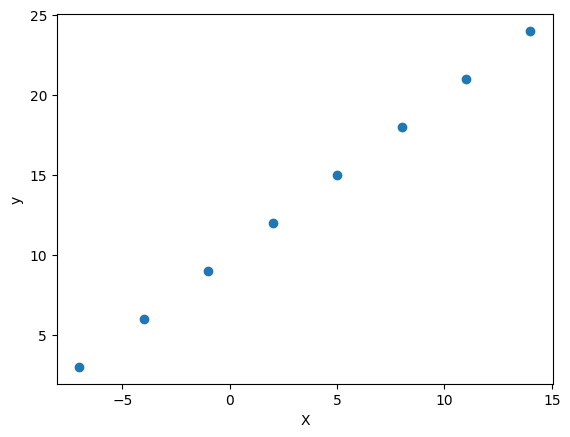

In [ ]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize features and labels
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Let's check the input and output shape (Note that these shapes are not correct one)
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [ ]:
# Let's check another input and output shape (Note that these shapes are not correct one)
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

As you see above, it seems our inputs and outputs have no shape. Let's turn numpy arrays to tensors for finding correct shape.

In [ ]:
# Turn numpy array to tensors
X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Check tensor shapes
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with Tensorflow

1. **Creating a model** - define input and output layer, as well as the hidden layers of deep learning model.
2. **Compiling  a model** - define the loss function (in other words, the function which tells our model how wrong it is) and optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performanse of our model)
3. **Fitting a model** - letting the model try to find patterns features and labels

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling a model
model.compile(
    loss=tf.keras.losses.mae, # mae short for mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # SGD short for stochastic gradient descent
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 340ms/step - loss: 9.8632 - mae: 9.8632
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 9.7307 - mae: 9.7307
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 9.5982 - mae: 9.5982
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 9.4657 - mae: 9.4657
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 9.3332 - mae: 9.3332


In [ ]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try to make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 66ms/step


array([[20.689644]], dtype=float32)

Our expection for 17.0 is 20.68 but model prediction is -23.68. This is so bad prediction.

## Improving Model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (called neuron) within each of the hidden layers, change the activation function of each layer
2. **Compiling a model** - Here we might change the optimization function or perhaps the learning rate of the optimization function
3. **Fitting a model** - Here we might change the number of epoch (leave it training for longer) or more data (give the model more example to learn from)

### Increasing number of epoch

In [ ]:
# Let's rebuild model (increasing number of epoch)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling a model
model.compile(
    loss=tf.keras.losses.mae, # mae short for mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # SGD short for stochastic gradient descent
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 323ms/step - loss: 13.3409 - mae: 13.3409
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.2084 - mae: 13.2084
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 13.0759 - mae: 13.0759
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9434 - mae: 12.9434
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8109 - mae: 12.8109
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 12.6784 - mae: 12.6784
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 12.5459 - mae: 12.5459
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 12.4134 - mae: 12.4134
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 12.2809 - mae: 12.2809
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1484 - mae: 12.1484
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
# Remind X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's make a new prediction
model.predict([17.0])

1/1 [==============================] - 0s 66ms/step


array([[29.60528]], dtype=float32)

Our expection is 27 and model prediction is 29.60. This is better and close than before.

### Adding more hidden layers with 100 neuron

In [ ]:
# Let's rebuild model

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compiling model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 835ms/step - loss: 13.6388 - mae: 13.6388
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 12.9795 - mae: 12.9795
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.3783 - mae: 12.3783
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8217 - mae: 11.8217
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2377 - mae: 11.2377
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5454 - mae: 10.5454
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.6637 - mae: 9.6637
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.5641 - mae: 8.5641
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.1431 - mae: 7.1431
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 5.2338 - mae: 5.2338
Epoch 11/100
1/1 [==============================] - 0s 9

In [ ]:
# Let's remind our data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Making a prediction
model.predict([17.0])

1/1 [==============================] - 0s 91ms/step


array([[33.03018]], dtype=float32)

This prediction is worse than before. The model may have been overfitting.

### Change the optimization function

Our optimization function is Stochastic Gradient Descent, let's make it Adam and see what will happen.

In [ ]:
# Let's rebuild model

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compiling model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.5813 - mae: 13.5813
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.1610 - mae: 13.1610
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 12.7825 - mae: 12.7825
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 12.4126 - mae: 12.4126
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.0682 - mae: 12.0682
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7311 - mae: 11.7311
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3921 - mae: 11.3921
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0480 - mae: 11.0480
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6959 - mae: 10.6959
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 10.3262 - mae: 10.3262
Epoch 11/100
1/1 [==============================] -

In [ ]:
# Remind data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Making a prediction
model.predict([17.0])

1/1 [==============================] - 0s 91ms/step


array([[31.864826]], dtype=float32)

### Change the learning rate

Learning rate's default parameter is 0.001 for Adam optimizer. Let's make it 0.01

In [ ]:
# Let's rebuild model

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compiling model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 911ms/step - loss: 13.5473 - mae: 13.5473
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3887 - mae: 11.3887
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7860 - mae: 8.7860
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 5.3476 - mae: 5.3476
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 5.2646 - mae: 5.2646
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 6.6080 - mae: 6.6080
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 5.8028 - mae: 5.8028
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 4.4337 - mae: 4.4337
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 3.7989 - mae: 3.7989
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 4.6800 - mae: 4.6800
Epoch 11/100
1/1 [==============================] - 0s 12ms/step

In [ ]:
# Remind the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 89ms/step


array([[28.542944]], dtype=float32)

Woowww.. It's look the best prediction..

### Common ways to improve a deep model

* Adding more hidden layers
* Adding more neurons
* Change the activation function
* Change the optimization function
* Change the learning rate
* Fitting for longer (increase number of epoch)
* Fitting on more data

## Evaluating a model

In practice, a typical workflow  you'll go through when building neural networks is:

```
Build a model -> Fit it -> Evaluate it -> Tweak a model -> Fit it -> Evaluate it -> Tweak a model -> Fit it -> Evaluate it -> Tweak a model -> Fit it -> Evaluate it ```

When it comes to evaluation. There are 3 words you memorized:

> 'Visualize, Visualize, Visualize...'

It is a good idea to visualize:
* The data - What data are we working with? What does it look like?
* The model itself - What does model look like?
* Traning of a model - How does a model perform while it learns?
* Prediction of the model -  How do the predictions of a model line up aganist the truth?

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# make labels for dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

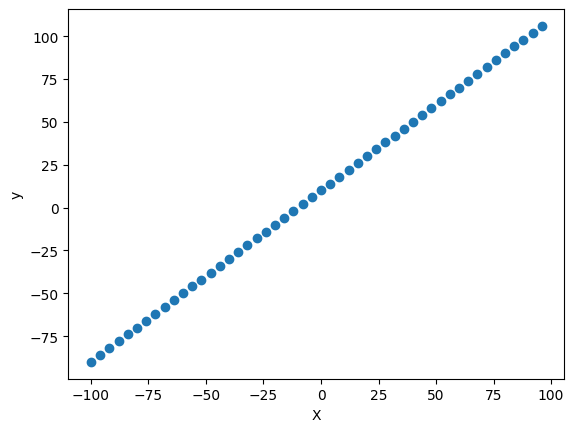

In [ ]:
# Plot data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### The three sets

* **Train set** - The model learns from this data, which is typically 70-80% of total data
* **Validation set** - The model gets tuned on this data which is typically 10-15% of total data
* **Test set** - The model gets evaulated on this data to test what is has learned, which is typically 10-15% of total data


In [ ]:
# Check the lenth of how many data we have
len(X)

50

In [ ]:
# Split the data into train and test set
X_train = X[:40] # first 40 are train samples (80% of our data)
y_train = y[:40]
            
X_test = X[40:] # last 10 are test samples (20% of our data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing data 

Now we've got our data in train and test sets. Let's visualize it again.

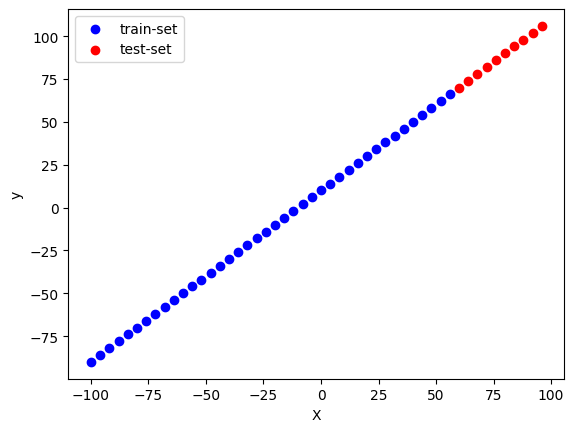

In [ ]:
# plot training data in blue
plt.scatter(X_train, y_train, c='b', label='train-set')
# plot test data in red
plt.scatter(X_test, y_test, c='r', label='test-set')
# show legend
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
# Let's build a neural network for our data

# 1.Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2.Compiling model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3.Fit the model
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # Pass this part and check what will happen if we summary the model

### Visulazing the model


In [ ]:
model.summary()

ValueError: ignored

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above we just add input_shape in Dense)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='model_1')

# 2. Compiling model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 15)                30        
                                                                 
 output_layer (Dense)        (None, 1)                 16        
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


Woww. Its work, now. But, what does it mean?

* **Total params** - Total number of parameters in the model
* **Trainable params** - These are the parameters that model can update as it trains.
* **Non-traianble params** - These are the parameters that model can not update (this is typical when you bring in already learn parameters from other models during transfer learning)

In [ ]:
# Fit the model with training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # verbose=0 means that dont show the progress bar as output

In [ ]:
# Get the summary of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 15)                30        
                                                                 
 output_layer (Dense)        (None, 1)                 16        
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


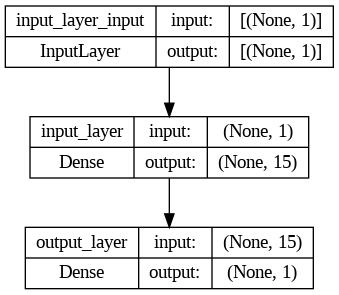

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visulazing our model's predictions

To visualize the predictions, it is good idea to plot them against the truth labels.

We generally call this as `y_preds`, `y_test` and `y_true`

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 57ms/step


array([[ 76.53106 ],
       [ 81.5165  ],
       [ 86.501945],
       [ 91.48739 ],
       [ 96.47283 ],
       [101.458275],
       [106.44372 ],
       [111.42917 ],
       [116.4146  ],
       [121.40005 ]], dtype=float32)

In [ ]:
# Let's create a plotting function
def plot_prediction(train_data=X_train, train_labels=y_train, 
     test_data=X_test, test_labels=y_test, predictions=y_pred):
  
  '''Ploting train data, test data and compare predictions with actual values'''

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', label='Test data')
  # Plot model in red
  plt.scatter(test_data, predictions, c='r', label='Prediction')
  # Show legend and plot
  plt.legend()
  plt.show()

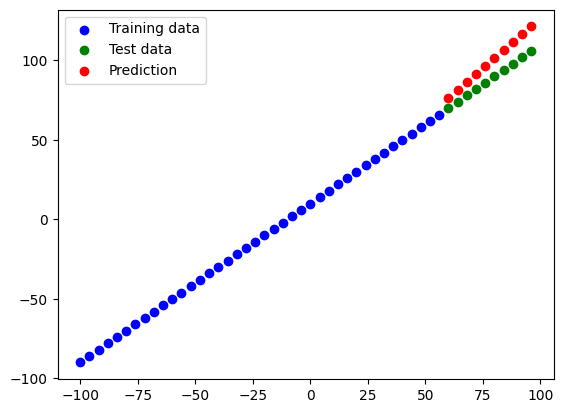

In [ ]:
plot_prediction(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending problem you are working on, there will be different evaluation metrics to evaluate your model's performance.

There are two main metrics for regression problem:
* MAE - mean absolute error, on average, how wrong is each of model's predictions
* MSE - mean square error, 'square the average errors'

In [ ]:
  # Evaluate the model on the test set
  model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 123ms/step - loss: 10.9656 - mae: 10.9656


[10.965551376342773, 10.965551376342773]

In [ ]:
# Calculate the mean absolute error
mae = tf.keras.losses.mean_absolute_error(y_true=y_test, 
                                    y_pred=tf.squeeze(y_pred)) # we used tf.squeeze for y_pred becase shape of y_pred is not same with y_test
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.965553>

In [ ]:
# Calculate the mean square error
mse = tf.keras.losses.mean_squared_error(y_true=y_test, 
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=128.25491>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.losses.mean_absolute_error(y_true, tf.squeeze(y_pred)).numpy()

def mse(y_true, y_pred):
  return tf.keras.losses.mean_squared_error(y_true, tf.squeeze(y_pred)).numpy()

In [ ]:
# MAE and MSE
print(f'Mean Absolute Error (MAE): {mae(y_test, y_pred)}')
print(f'Mean Square Error (MSE): {mse(y_test, y_pred)}')

Mean Absolute Error (MAE): 10.965553283691406
Mean Square Error (MSE): 128.25491333007812
